### Simple RNN

```
SimpleRNN(
    units, # 일반 신경망의 은닉층 노드 개수와 같은 개념
    activation,
    input_shape, # ex. (3,1): window size = 3, RNN layer로 한번에 1개의 data 들어감.
)
```

#### 학습 데이터 생성
RNN layer의 입력 data는 ```(batch_size, time_steps, input_dim)``` 형태로 시계열 data를 <strong>변형</strong>해 구축
- batch_size: 전체 시계열 data를 time_step으로 분리했을 때 데이터 총 개수
- time_step = window_size
- input_dim: RNN layer로 한번에 들어가는 data 개수

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

In [2]:
# 시계열 data 생성
x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2*x) - np.cos(x/2)

In [3]:
seq_data = y.reshape(-1,1)

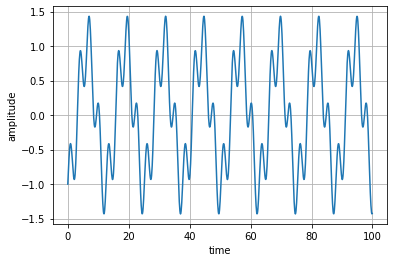

In [4]:
plt.grid()
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(x,y)
plt.show()

In [5]:
# 학습 data 생성 (window_size = 20, horizion_factor = 1)
w = 20
h = 1

def seq2dataset(seq, w, h):
    x_train = []
    y_train = []
    
    iteration = len(seq) - (w+h) +1
    
    for i in range(iteration):
        x_in = seq[i:i+w]
        y_in = seq[i+w+h-1]
        
        x_train.append(x_in)
        y_train.append(y_in)
        
    return np.array(x_train), np.array(y_train)

(x_train, y_train) = seq2dataset(seq_data, w, h)

In [6]:
print("seq[20]: ", x_train[1][-1], "==", y_train[0])

seq[20]:  [-0.91870355] == [-0.91870355]


In [7]:
print(x_train.shape)
print(y_train.shape)

(980, 20, 1)
(980, 1)


In [8]:
rnn = Sequential()

rnn.add(SimpleRNN(
    units=128,
    activation='tanh',
    input_shape=(w, 1)
))

rnn.add(Dense(1))

In [9]:
rnn.compile(optimizer='adam', loss='mse', metrics=['mae']) # mae: 오차의 절대값
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = rnn.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 1s 11ms/step - loss: 0.0671 - mae: 0.1911 - val_loss: 0.0054 - val_mae: 0.0573
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0453 - val_loss: 0.0022 - val_mae: 0.0414
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 6.4159e-04 - val_mae: 0.0196
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 4.9313e-04 - mae: 0.0170 - val_loss: 3.7872e-04 - val_mae: 0.0144
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 3.3482e-04 - mae: 0.0139 - val_loss: 2.1688e-04 - val_mae: 0.0107
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 2.0561e-04 - mae: 0.0106 - val_loss: 1.4455e-04 - val_mae: 0.0092
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 1.3738e-04 - mae: 0.0088 - val_loss: 2.9691e-04 - val_mae: 0.0143
Epoch 8/30
25/25 [==============================] - 0

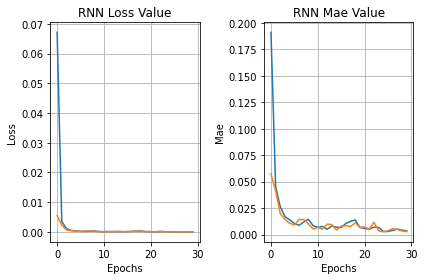

In [11]:
plt.subplot(1,2,1)

plt.title("RNN Loss Value")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")

plt.subplot(1,2,2)

plt.title("RNN Mae Value")
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.grid()

plt.plot(hist.history["mae"], label="mae")
plt.plot(hist.history["val_mae"], label="val_mae")

plt.tight_layout()

In [12]:
from random import Random

rand = Random().randrange(len(x_train))

In [13]:
x_test = x_train[rand:]
y_test = y_train[rand:]

In [14]:
pred = rnn.predict(x_test)

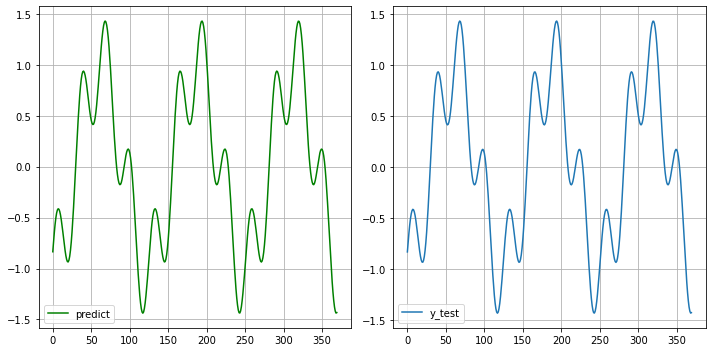

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.grid()
plt.plot(pred, label='predict', color='green')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.grid()
plt.plot(y_test, label='y_test')
plt.legend(loc='best')

plt.tight_layout()
plt.show()